# w_03 | Seaborn

* Vamos a recorrer sistemáticamente las distintas categorías de la API de Seaborn.
* Traemos un dataset e importamos las librerías necesarias
    * Todo Seaborn se suele usar desde el módulo principal que se le asigna el alias `sns`

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np

inc = pd.read_csv("https://catalogodatos.gub.uy/dataset/239103c3-a3f4-4d3c-93f6-008198eeda62/resource/e45a435f-0968-4868-9759-2038840b836d/download/inc-ofrecimientostierra-datos-v20210804.csv", sep=";",on_bad_lines='skip', decimal=",")
inc["Fecha"] = pd.to_datetime(inc["Fecha ingreso trámite"],format='mixed', errors="coerce")
inc[["Departamento", "aux"]] = inc["Padrones"].str.split("->", expand=True).iloc[:, :2]
inc["Rural"] = inc["aux"].str.split(":", expand=True).iloc[:, 0]
inc.drop(["aux", "Tipo de negocio.1", "aux", "Fecha ingreso trámite", "Padrones", "Multa por incumplimiento"], axis=1, inplace=True)
inc = inc.loc[inc["Moneda"] == "U$S", :]
inc = inc.loc[inc["Fecha"] > "2008-01-01", :]
inc.rename({"Precio total": "Precio", "Superficie total(ha)": "Sup", "Superficie CONEAT 100 (ha)": "Sup CONEAT"}, inplace=True, axis=1)
inc["Sup CONEAT"].replace(0, np.nan, inplace=True)
inc["Precio"] = inc["Precio"] / 1000
inc["Calidad"] = inc["Sup CONEAT"] / inc["Sup"]
inc["Calidad"] = inc["Calidad"].where(inc["Calidad"] < 5, pd.NA)
inc["PPH"] = inc["Precio"] / inc["Sup"] * 1000
inc.head()

C:\Users\cpiriz\AppData\Local\Temp\ipykernel_8676\3361742964.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inc["Sup CONEAT"].replace(0, np.nan, inplace=True)


,Tipo,Plan estabilidad lechero?,Fracciones Artº5,Tipo de negocio,Nº expediente,Estado de ocupación,Moneda,Precio,Sup,Sup CONEAT,Mejoras que incluye,Forma de entrega,Forma y plazo pago,Fecha,Departamento,Rural,Calidad,PPH
0,Por Art. 35º,NO,NaN,Compraventa,2024-70-1-01237,Ocupado,U$S,12485.200,1274.9140,1927.0000,suelos y mejoras,Arrendado hasta 01/07/25,-US$ 1.248.520 se entregó en caracter de seña ...,2024-07-29,Río Negro,Rural,1.511474,9792.974271
1,Por Art. 35º,NO,NaN,Compraventa,2024-70-1-01241,Libre,U$S,3200.000,785.9814,809.5608,Suelos y mejoras,Libre,- U$S 2.825.000 conjuntamente con el otorgamie...,2024-07-29,Durazno,Rural,1.030000,4071.343164
2,Por Art. 35º,NO,NaN,Compraventa,2024-70-1-01219,Ocupado,U$S,2769.308,1130.3300,802.5343,La operación comprende suelos y mejoras.,Se entregará simultáneamente con la suscripció...,a) U$S 1.000.000 simultáneamente al otorgamien...,2024-07-25,Paysandú,Rural,0.710000,2449.999558
3,Por Art. 35º,NO,NaN,Compraventa,2024-70-1-01196,Libre,U$S,1375.000,251.9910,280.7000,La operación comprende suelos y mejoras,El venta se realizará libre de ocupantes.,Al momento de la suscripción del negocio defin...,2024-07-22,Río Negro,Rural,1.113929,5456.544083
4,Por Art. 35º,NO,NaN,Compraventa,2024-70-1-01191,Libre,U$S,2002.744,500.6862,665.1926,Suelos y mejoras,La posesión jurídica del inmueble se entregará...,120 días a contar del 14/06/24,2024-07-22,Cerro Largo,Rural,1.328562,3999.998402


In [7]:
inc.shape

(2079, 18)

In [8]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2079 entries, 0 to 2083
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tipo                       2079 non-null   object        
 1   Plan estabilidad lechero?  2079 non-null   object        
 2   Fracciones Artº5           131 non-null    object        
 3   Tipo de negocio            2029 non-null   object        
 4   Nº expediente              2078 non-null   object        
 5   Estado de ocupación        1009 non-null   object        
 6   Moneda                     2079 non-null   object        
 7   Precio                     2079 non-null   float64       
 8   Sup                        2079 non-null   float64       
 9   Sup CONEAT                 990 non-null    float64       
 10  Mejoras que incluye        995 non-null    object        
 11  Forma de entrega           991 non-null    object        
 12  Forma y pla

* `sns.scatterplot()` in `sns.lineplot()` muestran relaciones entre variables continuas.
* Continua refiere a que no hay saltos discretos en la distribución de la variable.

<Axes: xlabel='Fecha', ylabel='Precio'>

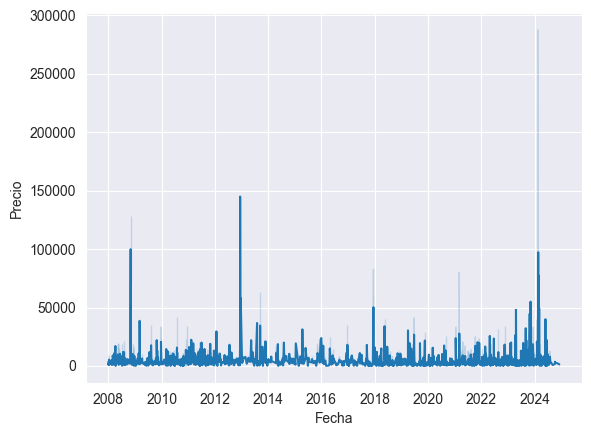

In [9]:
sns.set_style(style="darkgrid", rc={"figure.figsize": (12, 6)})

sns.lineplot(data=inc, x="Fecha", y="Precio")

* Notar 3 parámetros clave
    * `data` refiere a los datos a graficar. Esto en general debería ser un `pandas.DataFrame`, pero pero puede ser un `dict`, numpy arrays o incluso listas.
    * `x` e `y` refiere a qué graficar en cada eje.
        * Se refiere a ellos por el nombre de la columna en el caso de que `data` sea un df.
    * Seaborn asume que la data es wide-form cuando `x` e `y` no están asignados.

* Cuando hay varios valores para un mismo `x`,  Seaborn las agrega y muestra un intervalo de confianza.

<Axes: xlabel='Fecha', ylabel='Precio'>

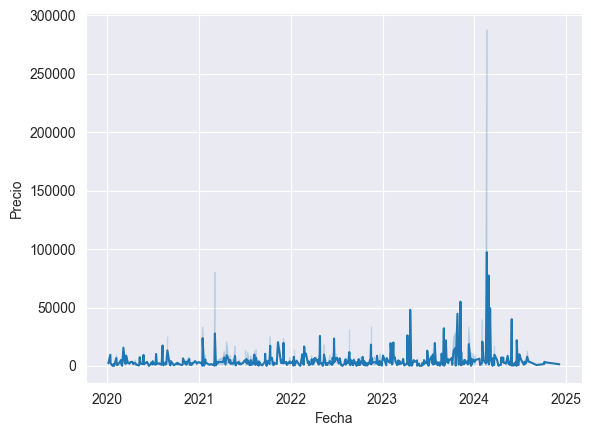

In [10]:
sns.lineplot(data=inc.loc[inc["Fecha"] > "2020-01-01"], x="Fecha", y="Precio")

* También se puede definir que en lugar de mostrar un intervalo de confianza se muestre el desvío estándar.

<Axes: xlabel='Fecha', ylabel='Precio'>

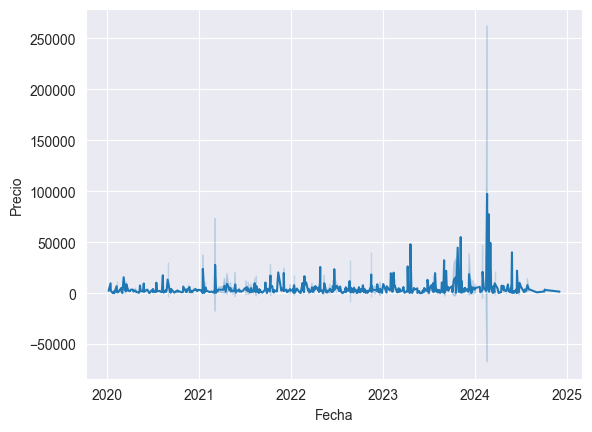

In [11]:
sns.lineplot(data=inc.loc[inc["Fecha"] > "2020-01-01"], x="Fecha", y="Precio", errorbar='sd' )

* Podemos definir cómo agrega observaciones.
    * O que no las agregue con `estimator=None`

El parámetro estimator en la función sns.lineplot() de Seaborn controla cómo se calcula y muestra el valor central de la distribución de los datos cuando estás trazando una línea. En otras palabras, determina cómo se representa la tendencia general de los datos en el gráfico de líneas.

<Axes: xlabel='Fecha', ylabel='Precio'>

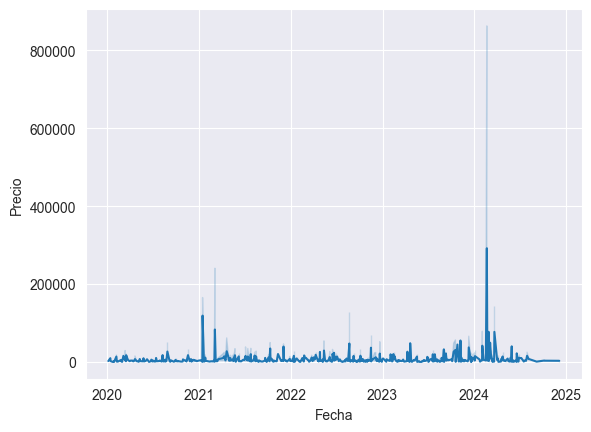

In [12]:
sns.lineplot(data=inc.loc[inc["Fecha"] > "2020-01-01"], x="Fecha", y="Precio", estimator="sum")

* Por defecto `x` e `y` son ordenados antes de graficar.
    * El ordenamiento de los ejes se puede desactivar.Esto significa que los puntos se conectarán en el orden en que aparecen en el conjunto de datos, sin importar si están en orden cronológico o no

<Axes: xlabel='Fecha', ylabel='Precio'>

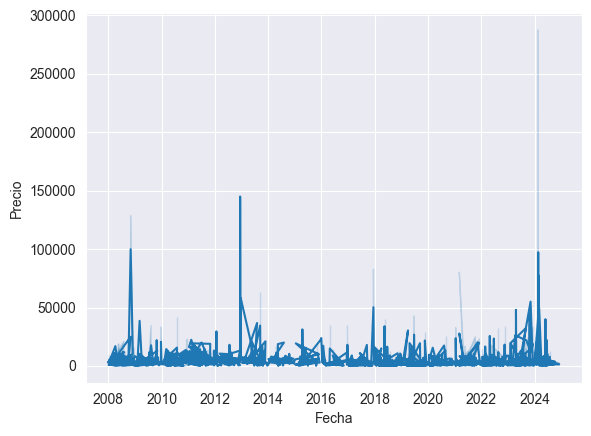

In [13]:
sns.lineplot(data=inc, x="Fecha", y="Precio", sort=False)

* Como vimos, `hue`, `style` y `size` permiten agregar dimensiones.
* En el siguiente paso pasamos a usar `seaborn.scatterplot()`.

* `hue="Departamento"`: Esta opción permite codificar una tercera variable categórica ("Departamento") utilizando colores diferentes para cada categoría. Cada punto en el gráfico estará coloreado según el valor de la columna "Departamento".

* `size="Estado de ocupación"`: Esta opción permite ajustar el tamaño de los puntos en función de otra variable categórica ("Estado de ocupación"). Los puntos tendrán tamaños diferentes según el valor de esta columna.

* `style="Tipo de negocio"`: Esto permite asignar diferentes estilos a los puntos en función de otra variable categórica ("Tipo de negocio"). Los puntos pueden tener formas diferentes para cada valor de esta columna.

<Axes: xlabel='Sup', ylabel='Precio'>

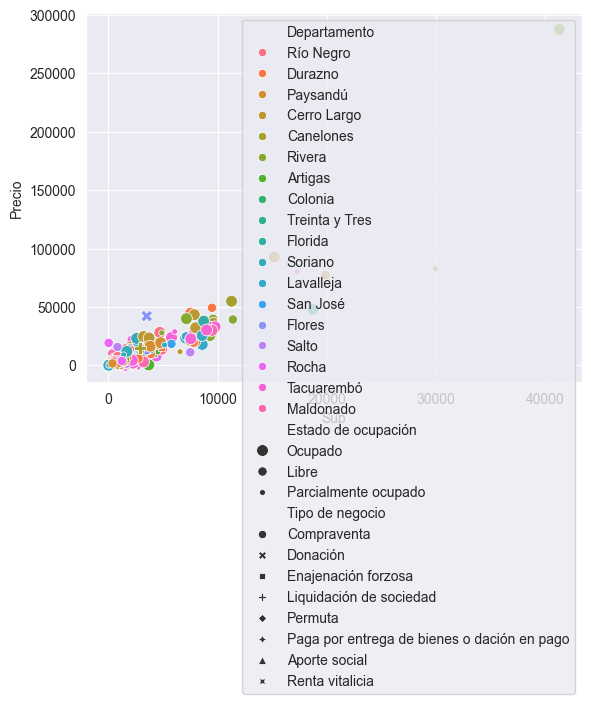

In [14]:
sns.scatterplot(data=inc, x="Sup", y="Precio", hue="Departamento",
                size="Estado de ocupación", style="Tipo de negocio")

* Esta leyenda es difícil de ubicar porque tiene muchas categorías.
* En estos casos podemos optar por moverla manualmente, o usar funciones a nivel de figura.
    * En la siguiente celda usamos `seaborn.relplot`, que es la función de figuras correspondiente a gráficos relacionales.
    * Por defecto la leyenda se ubica por fuera de la gráfica.
    * Las funciones de figura permiten definir `height` y `aspect` para controlar las dimensiones.

El parámetro aspect está configurado como 1.2, lo que significa que el ancho del gráfico será 1.2 veces más grande que su altura

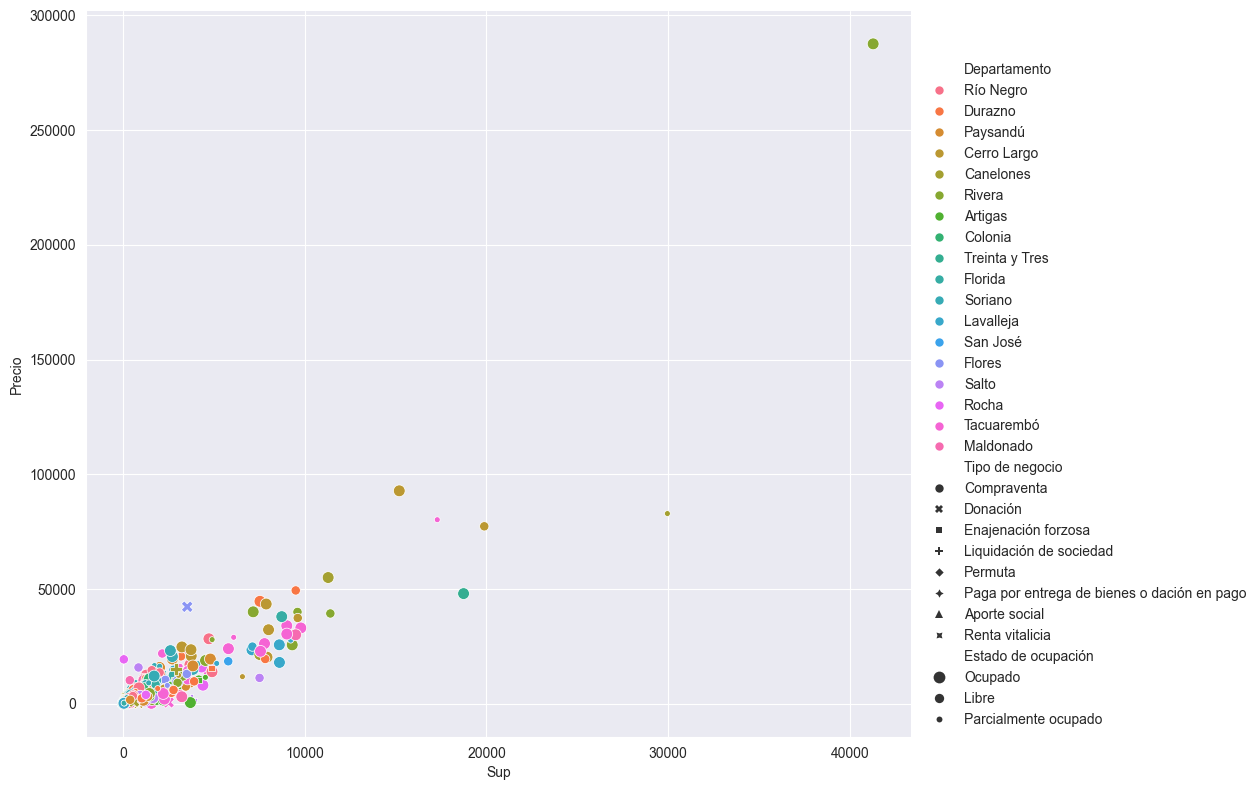

In [15]:
sns.relplot(data=inc, x="Sup", y="Precio", hue="Departamento",
                size="Estado de ocupación", style="Tipo de negocio", kind="scatter",height=8, aspect=1.2)

* Para mover la leyenda vamos a usar MPL.
    * Podemos usar ambas interfaces.

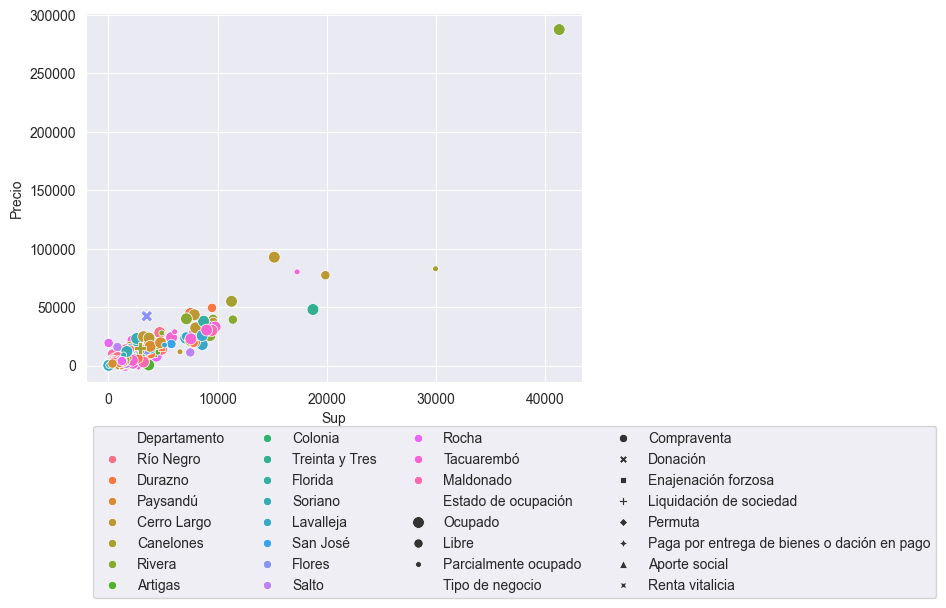

In [16]:
import matplotlib.pyplot as plt

g = sns.scatterplot(data=inc, x="Sup", y="Precio", hue="Departamento",
                size="Estado de ocupación", style="Tipo de negocio")
g.legend(loc="upper left", bbox_to_anchor=(0, -0.1), ncol=4)

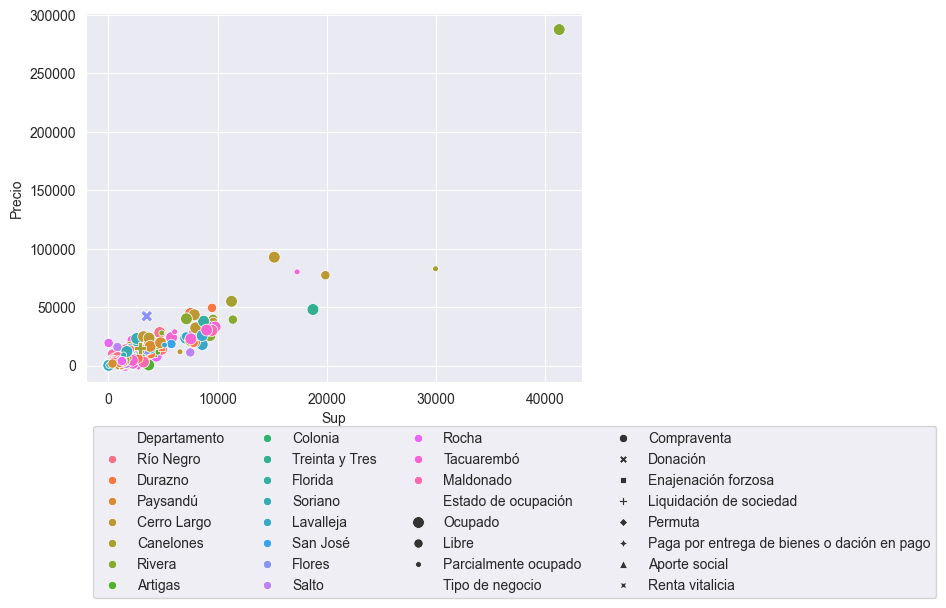

In [17]:
import matplotlib.pyplot as plt

sns.scatterplot(data=inc, x="Sup", y="Precio", hue="Departamento",
                size="Estado de ocupación", style="Tipo de negocio")
plt.legend(loc="upper left", bbox_to_anchor=(0, -0.1), ncol=4)

* Funciones de nivel de eje (`axes-level functions`): Estas funciones, como `sns.scatterplot()`, `sns.lineplot()`, etc., devuelven un objeto de tipo "ejes" que representa un solo eje del gráfico. Puedes acceder directamente a los métodos y propiedades del objeto "ejes" para personalizar el gráfico de manera detallada. Por ejemplo, puedes agregar leyendas, títulos y personalizar los ejes.

* Funciones de nivel de figura (`figure-level functions`): Estas funciones, como `sns.relplot()`, sns.catplot(), etc., crean una figura completa que contiene uno o más ejes. Estas funciones generalmente tienen un alto nivel de automatización y permiten crear tipos de gráficos más complejos. Sin embargo, debido a esta automatización, a veces ciertas personalizaciones detalladas no son directamente accesibles.

* Notar que si llamamos una `figure-level function`, los axes no están disponibles a primer nivel. Esto quiere decir que cuando usas una función de nivel de figura como `sns.relplot()`, los objetos de "ejes" no están directamente disponibles a nivel superior (primer nivel). En otras palabras, no puedes acceder y personalizar los ejes individualmente como lo harías con las funciones de nivel de eje.

Traceback (most recent call last):
  File "C:\Users\cpiriz\AppData\Local\Temp\ipykernel_8676\1656612871.py", line 6, in <module>
    g.legend(loc="upper left", bbox_to_anchor=(0, -0.1), ncol=4)
TypeError: 'Legend' object is not callable


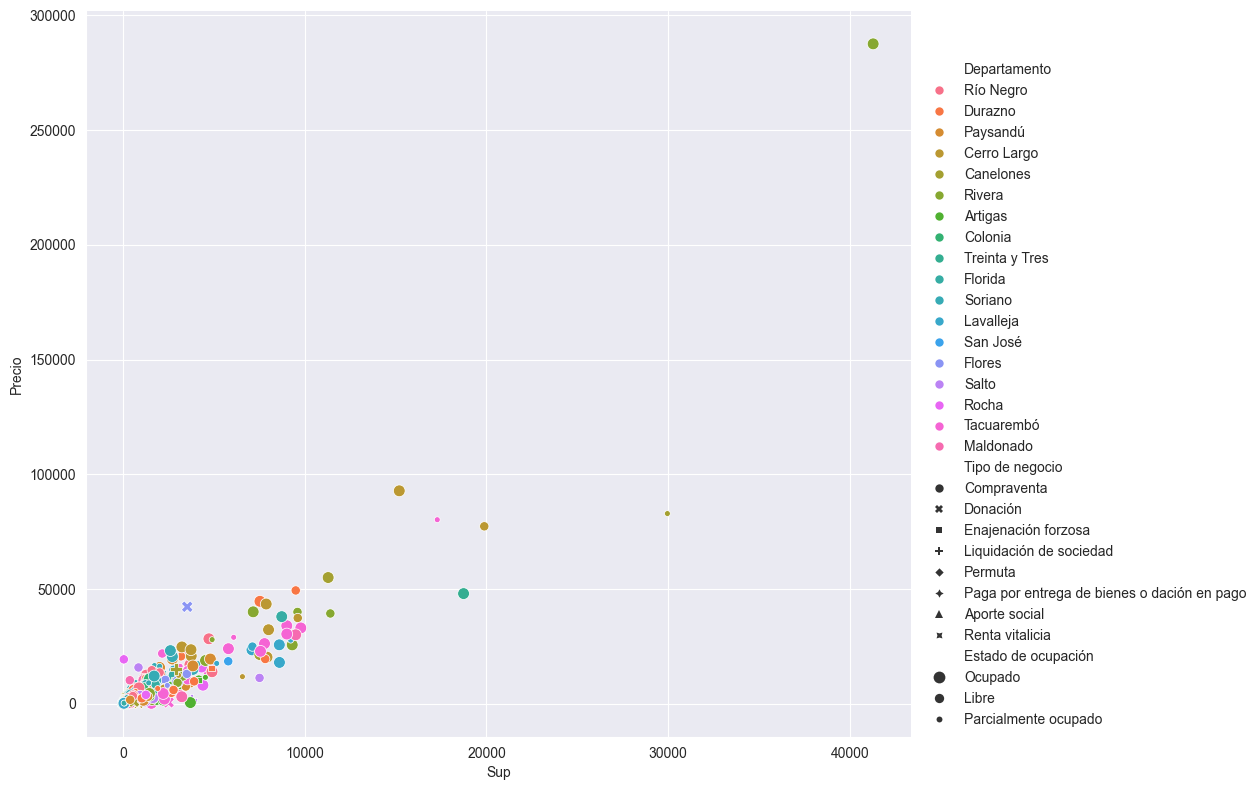

In [18]:
import traceback

g = sns.relplot(data=inc, x="Sup", y="Precio", hue="Departamento",
                size="Estado de ocupación", style="Tipo de negocio", kind="scatter", height=8, aspect=1.2)
try:
    g.legend(loc="upper left", bbox_to_anchor=(0, -0.1), ncol=4)
except TypeError:
    traceback.print_exc()

* Pero podemos acceder a los axes para hacer modificaciones.
    * En este ejemplo mostramos como acceder al axes y definir una nueva leyenda.
    * Para que no queden leyendas duplicadas definimos `legend=False` en `relplot`, pero eso nos hace perder los datos de las leyendas.

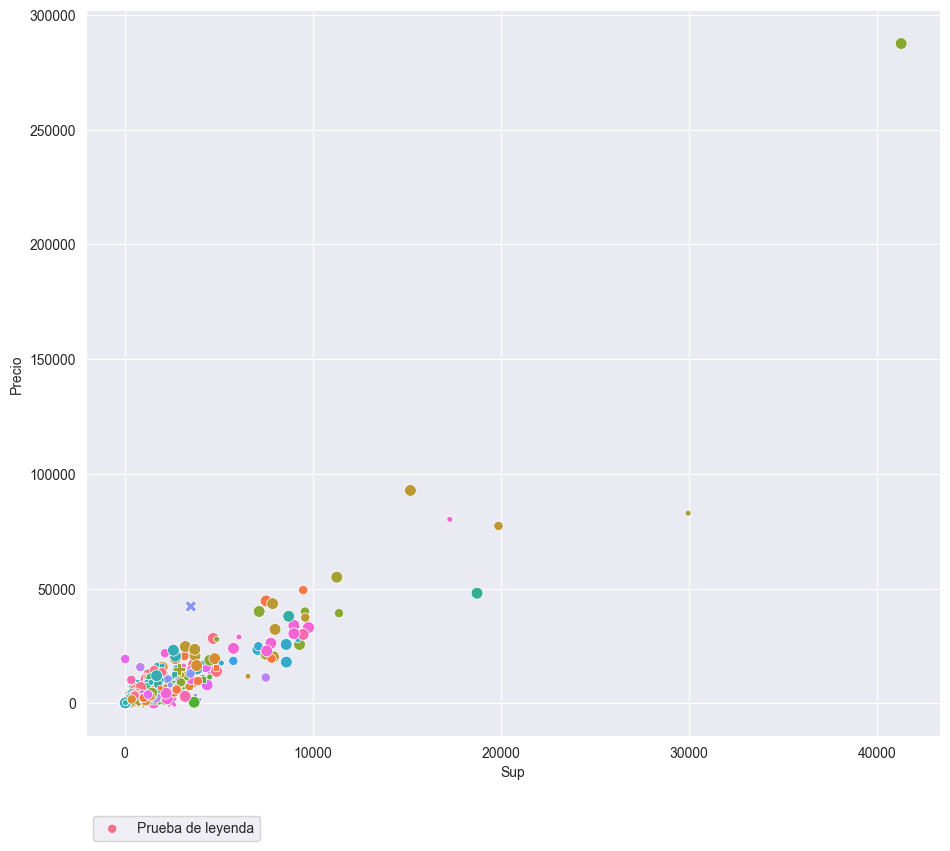

In [19]:
g = sns.relplot(data=inc, x="Sup", y="Precio", hue="Departamento",
                size="Estado de ocupación", style="Tipo de negocio", kind="scatter", height=8, aspect=1.2, legend=False)
g.ax.legend(["Prueba de leyenda"], loc="upper left", bbox_to_anchor=(0, -0.1), ncol=4)

* Cuando usamos figure-level functions podemos especificar qué tipo de gráfico hacer con el parámetro `kind`, como `kind=scatter`.

* Es posible definir los colores con `palette`. Acepta algunos strings dados, y colormaps de MPL.

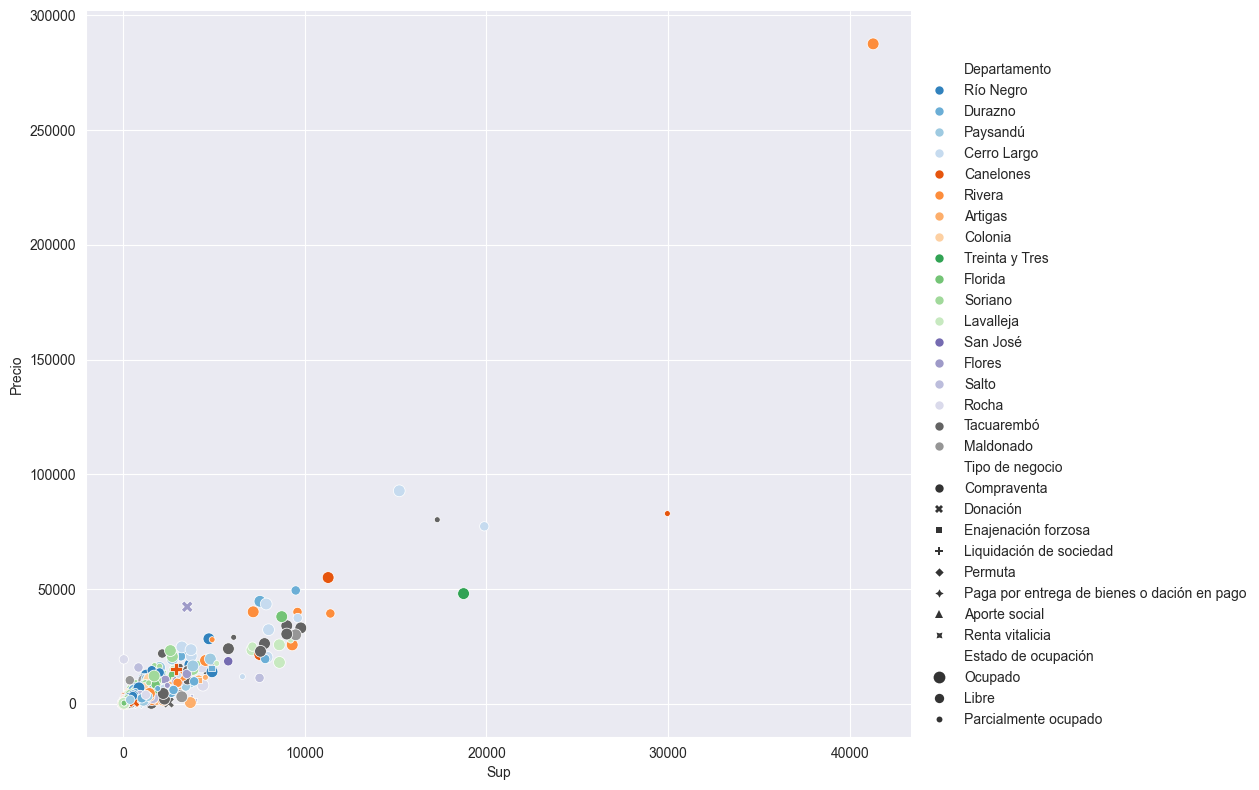

In [20]:
sns.relplot(data=inc, x="Sup", y="Precio", hue="Departamento",
                size="Estado de ocupación", style="Tipo de negocio", kind="scatter", height=8, aspect=1.2, palette="tab20c")

* Los gráficos a nivel de axes aceptan un parámetro `ax`, lo que implica que podemos combinarlo con MPL fácilmente.

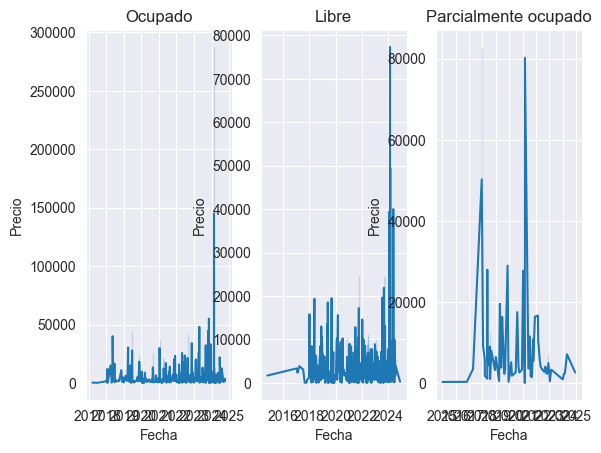

In [21]:
fig, axs = plt.subplots(1, 3)
for ax, estado in zip(axs, inc["Estado de ocupación"].unique()):
    sns.lineplot(ax=ax, data=inc.loc[inc["Estado de ocupación"] == estado, :], x="Fecha", y="Precio")
    ax.set_title(estado)

* Pero muchas veces es más fácil usar `col` con figure-level functions.
* `col_wrap` define el máximo de gráficos por fila.
* Hay parámetros análogos para filas.

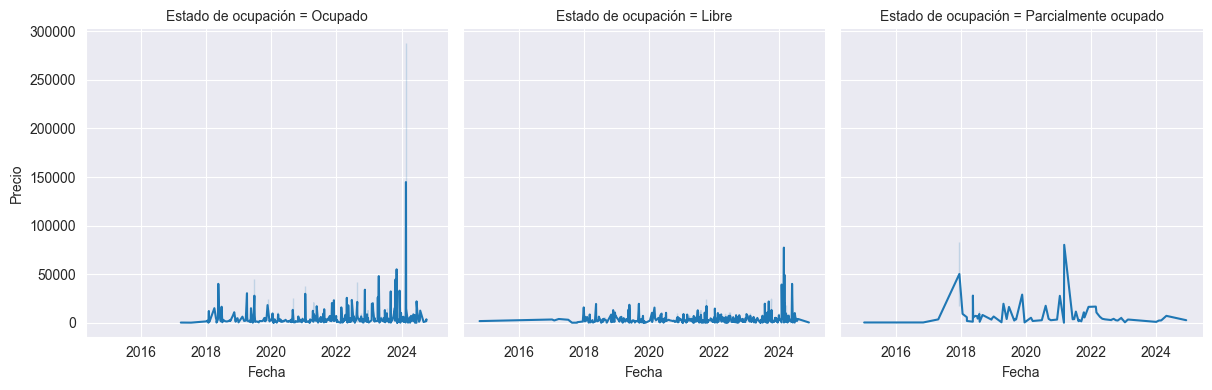

In [22]:
sns.relplot(data=inc, x="Fecha", y="Precio", col="Estado de ocupación", col_wrap=4, kind="line",height=4)

* Así como podemos graficar relaciones entre variables, podemos verificar distribuciones.
* Eso se hace con las funciones `displot()` (a nivel de figura, y con la posibilidad de armar grids), `histplot()` para histogramas y `kdeplot()` para kernel distributions (como un histograma).


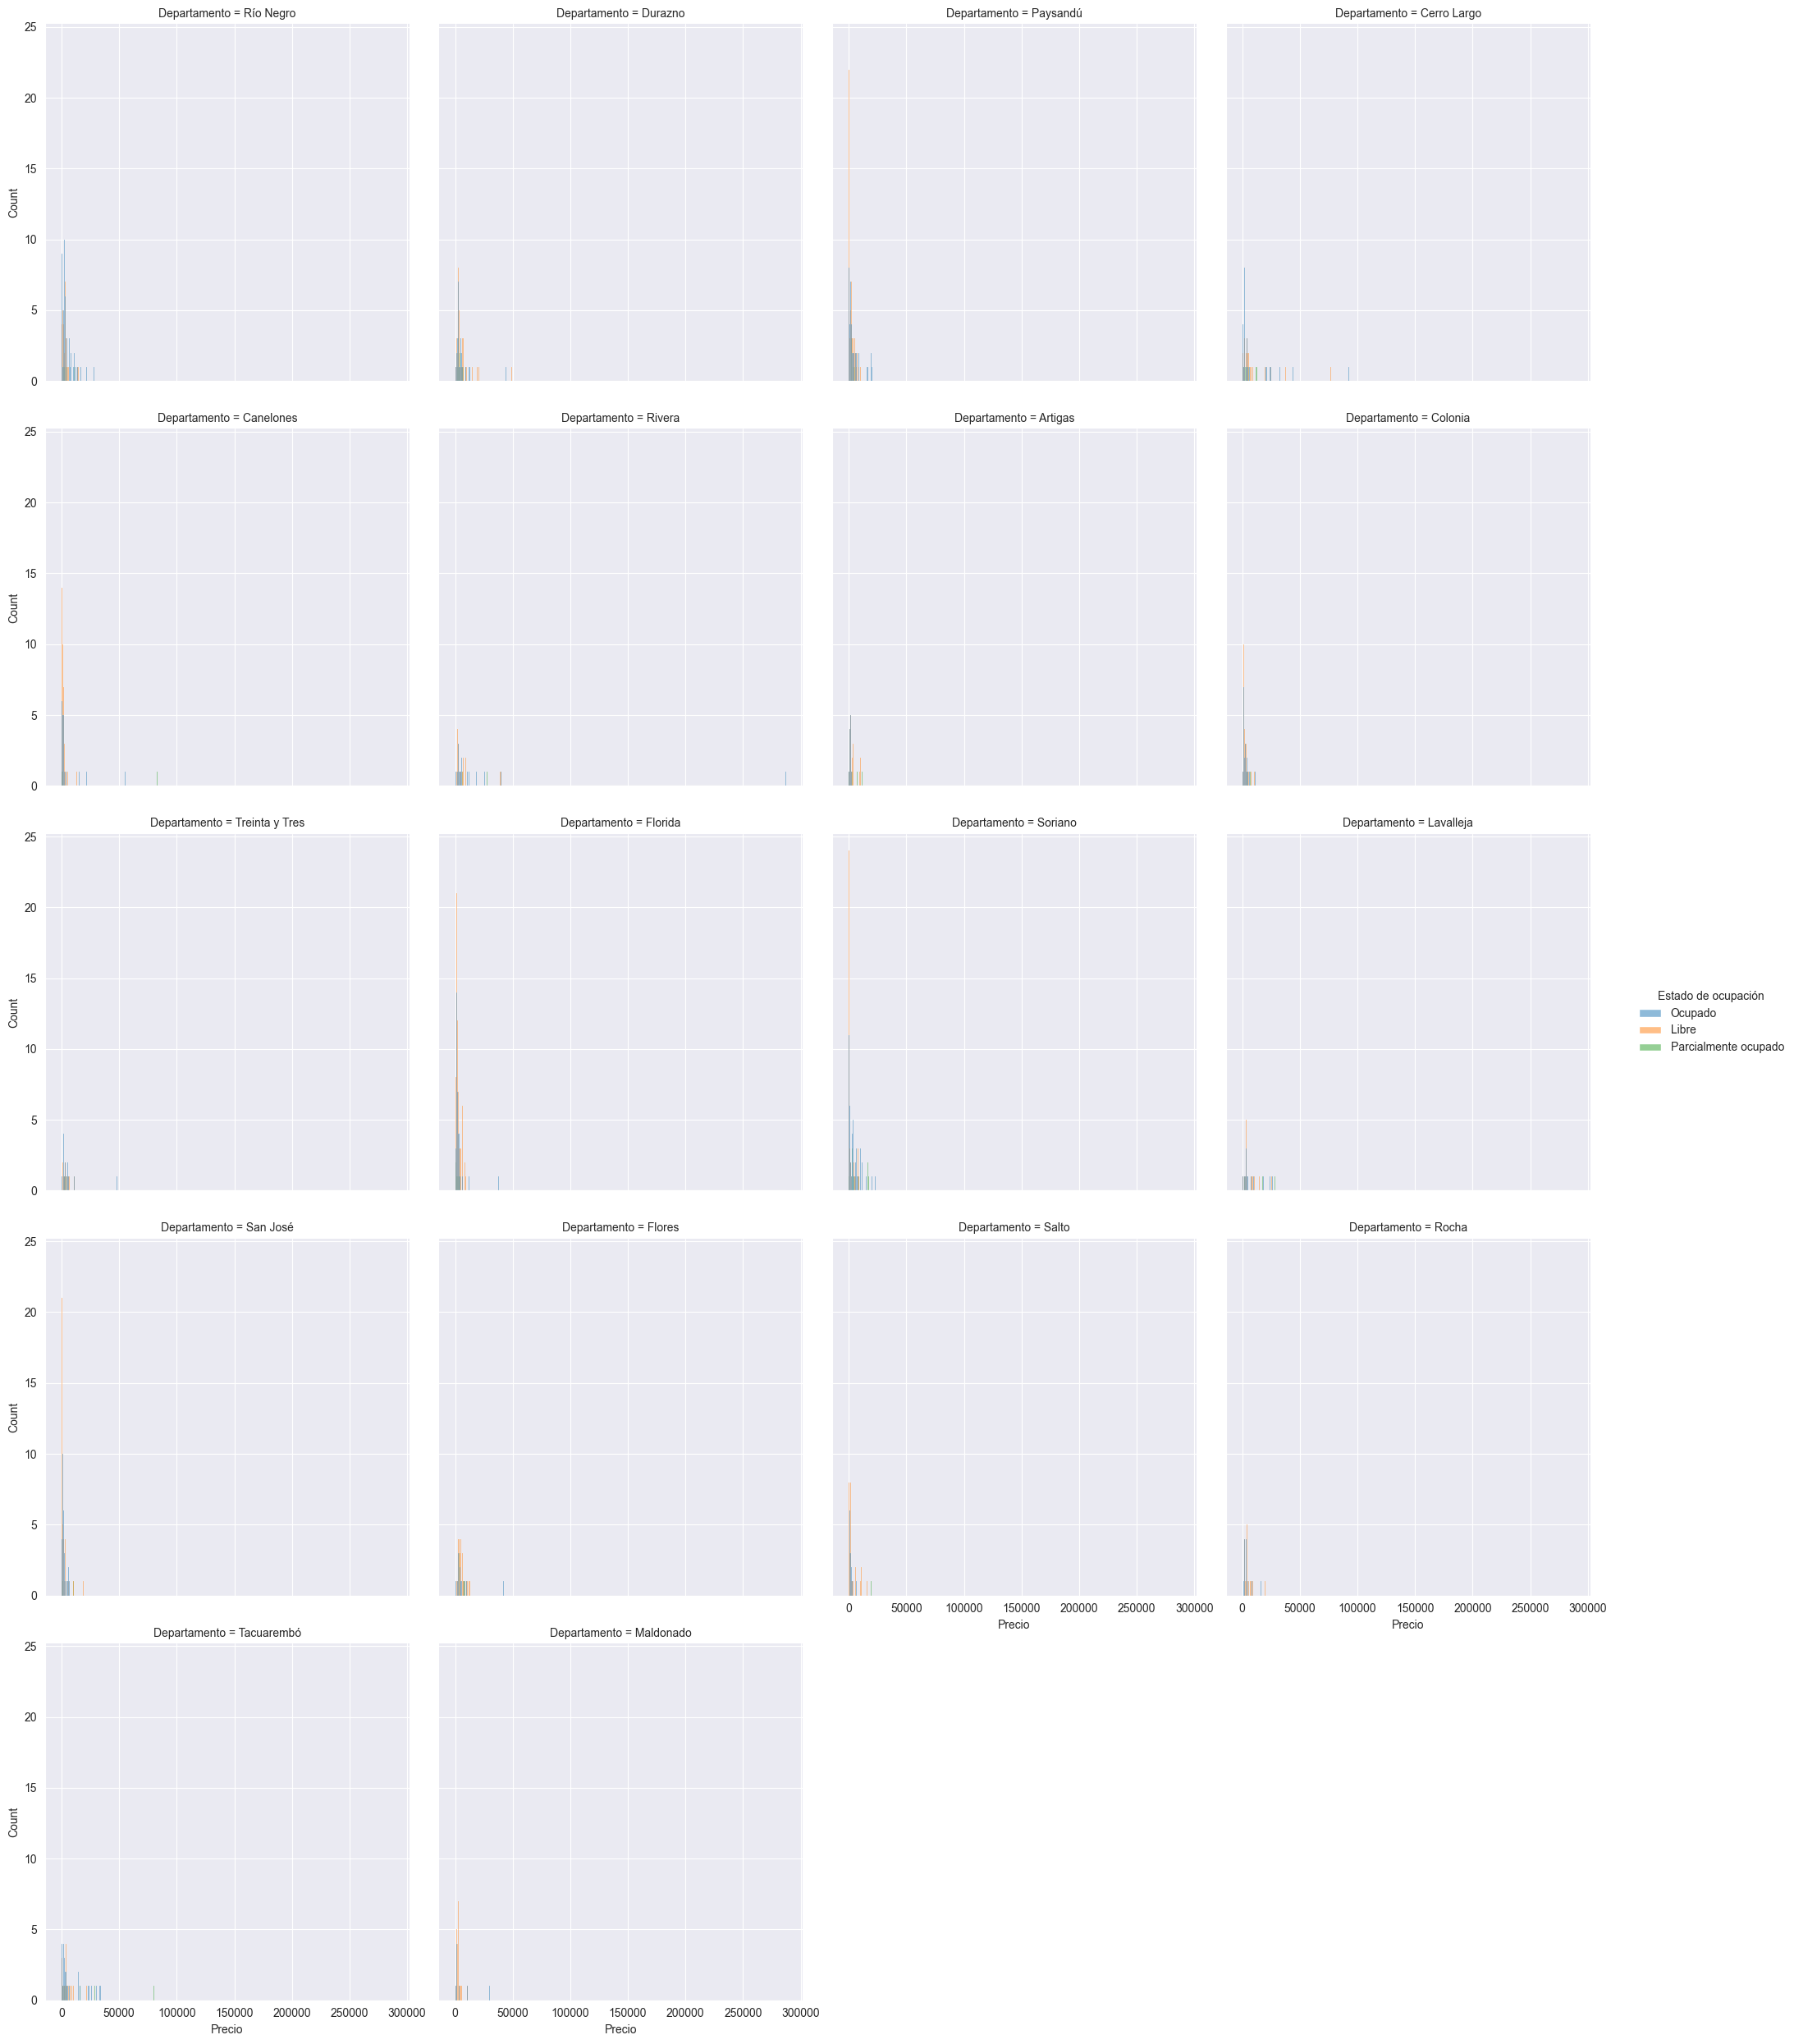

In [23]:
sns.displot(data=inc, x="Precio", kind="hist", hue="Estado de ocupación", col="Departamento", col_wrap=4)

* Finalmente, las funciones `catplot()` se usan para gráficar cuando alguna de los ejes tiene variables categóricas.
* En este grupo entran `barplot()`, `boxplot()` y `violinplot`.

* `countplot()` merece una mención especial, dado que funciona como un gráfico de barras que automáticamente cuenta observaciones.

<Axes: xlabel='Estado de ocupación', ylabel='count'>

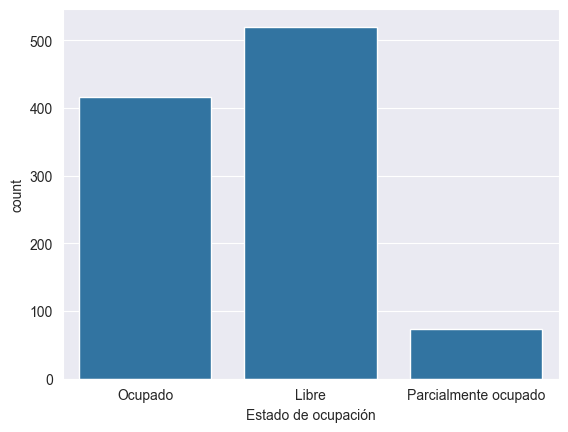

In [24]:
sns.countplot(data=inc, x="Estado de ocupación")

<Axes: xlabel='Estado de ocupación', ylabel='Precio'>

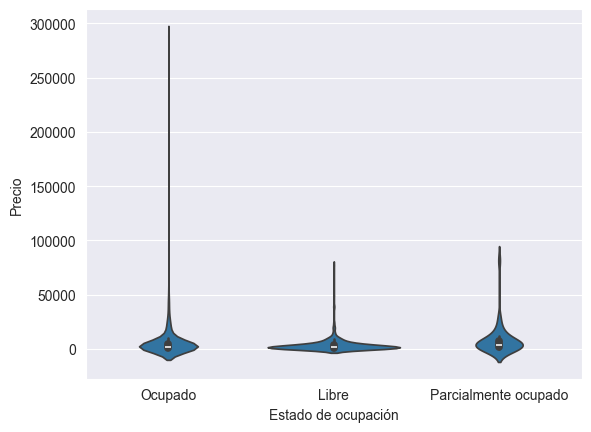

In [25]:
sns.violinplot(data=inc, x="Estado de ocupación", y="Precio")

* La fortaleza de Seaborn es que nos permite cambiar entre tipos de gráficas muy rápido sin cambiar los parámetros.

<Axes: xlabel='Estado de ocupación', ylabel='Precio'>

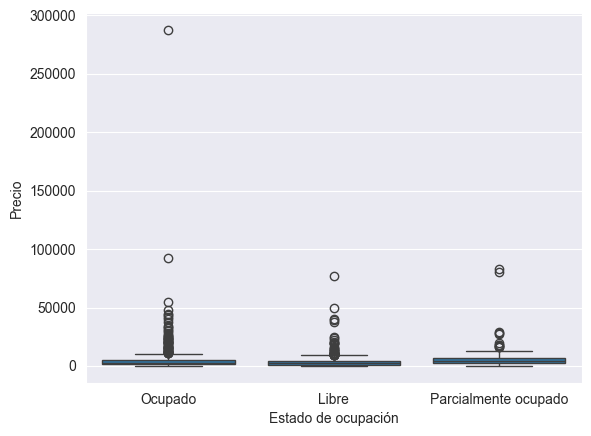

In [26]:
sns.boxplot(data=inc, x="Estado de ocupación", y="Precio")

* `pairplot()` es un tipo de gráfica que no entra en la lógica de las anteriores, pero ayuda a reconocer un dataset muy rápido.

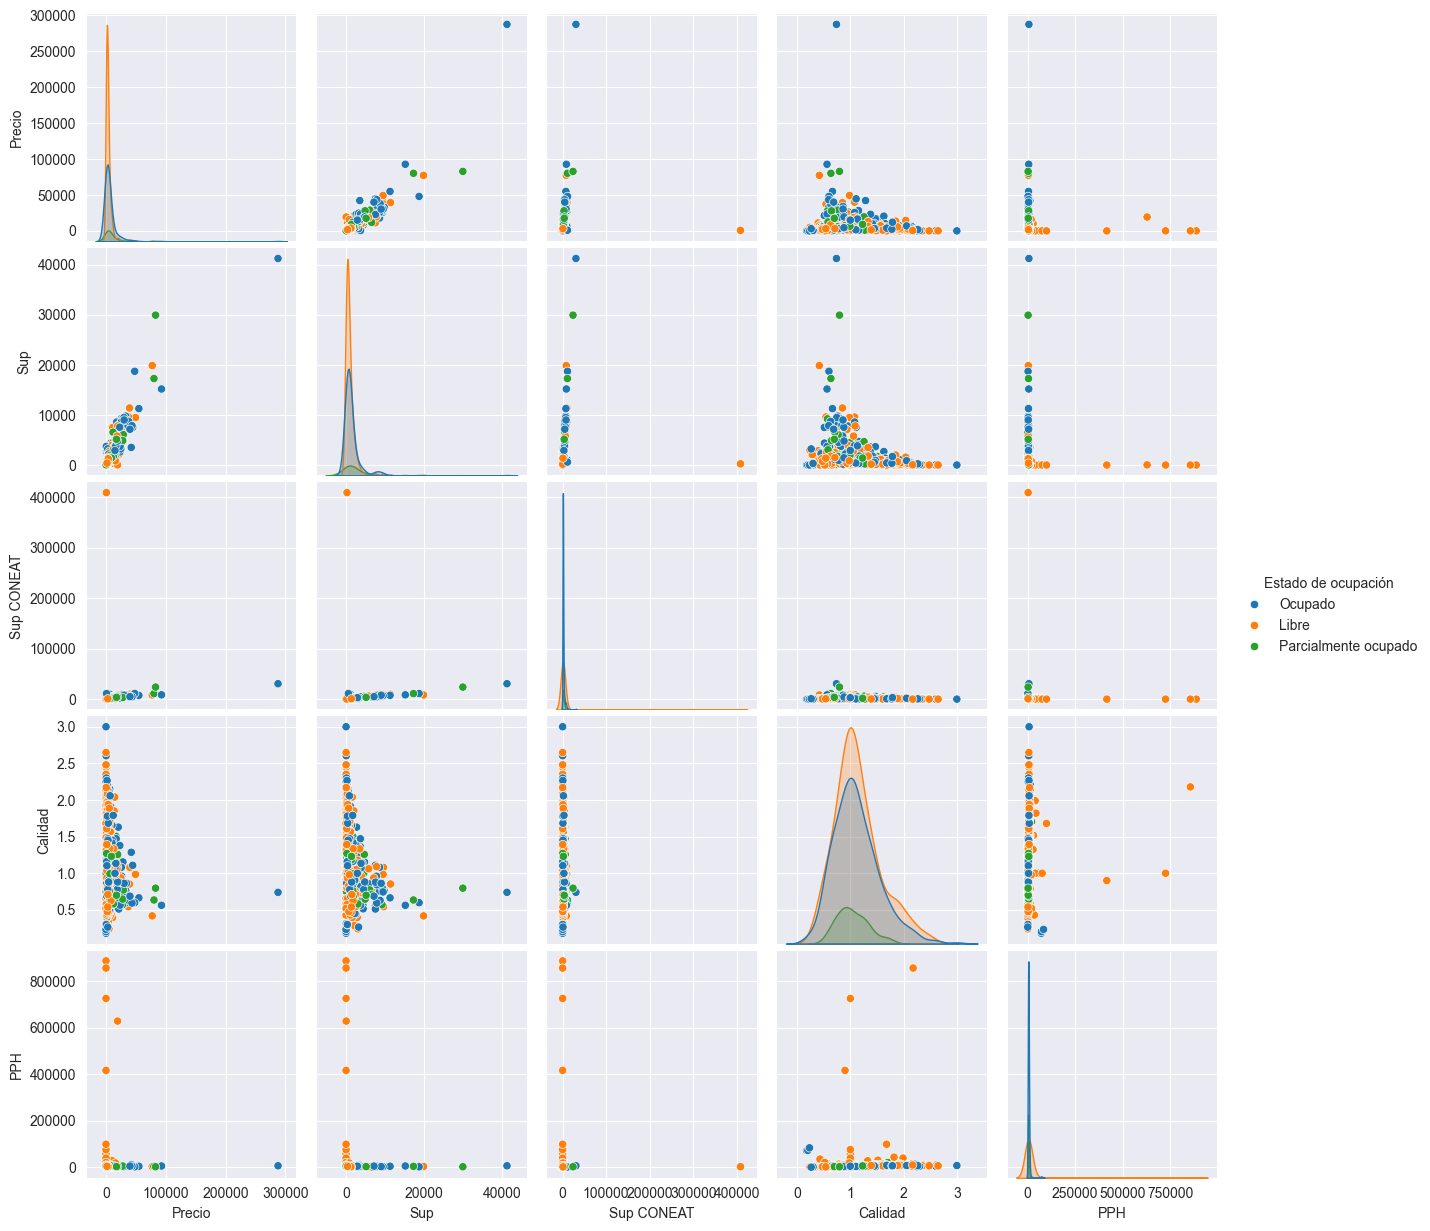

In [27]:
sns.pairplot(data=inc, hue="Estado de ocupación")

# Fin